In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e0b7bb3a481984af1504685e848a237


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | aquiraz
Processing Record 3 of Set 1 | paita
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | sept-iles
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | timizart
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | madang
Processing Record 10 of Set 1 | coahuayana
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | fairview
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | palmer
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | nizhniy kuranakh
Processing Record 19 of Set 1 | cap malheureux
Processing Record 20 of Set 1 | hamina
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | albany
Processing

Processing Record 1 of Set 5 | charyshskoye
Processing Record 2 of Set 5 | mahon
Processing Record 3 of Set 5 | solsvik
City not found. Skipping...
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | obregon
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | xifeng
Processing Record 9 of Set 5 | ust-nera
Processing Record 10 of Set 5 | yaan
Processing Record 11 of Set 5 | umtata
Processing Record 12 of Set 5 | kawana waters
City not found. Skipping...
Processing Record 13 of Set 5 | gamba
Processing Record 14 of Set 5 | ahipara
Processing Record 15 of Set 5 | itoman
Processing Record 16 of Set 5 | hay river
Processing Record 17 of Set 5 | dingle
Processing Record 18 of Set 5 | peski
Processing Record 19 of Set 5 | grindavik
Processing Record 20 of Set 5 | ndioum
Processing Record 21 of Set 5 | shubarkuduk
Processing Record 22 of Set 5 | naze
Processing Record 23 of Set 5 | karkaralinsk
City not found. Skipp

Processing Record 1 of Set 9 | sur
City not found. Skipping...
Processing Record 2 of Set 9 | baruun-urt
City not found. Skipping...
Processing Record 3 of Set 9 | ust-maya
City not found. Skipping...
Processing Record 4 of Set 9 | puerto el triunfo
City not found. Skipping...
Processing Record 5 of Set 9 | mayumba
City not found. Skipping...
Processing Record 6 of Set 9 | richards bay
City not found. Skipping...
Processing Record 7 of Set 9 | oshakati
City not found. Skipping...
Processing Record 8 of Set 9 | kahului
City not found. Skipping...
Processing Record 9 of Set 9 | bankura
City not found. Skipping...
Processing Record 10 of Set 9 | ermelo
City not found. Skipping...
Processing Record 11 of Set 9 | aljezur
City not found. Skipping...
Processing Record 12 of Set 9 | oskemen
City not found. Skipping...
Processing Record 13 of Set 9 | siilinjarvi
City not found. Skipping...
Processing Record 14 of Set 9 | benguela
City not found. Skipping...
Processing Record 15 of Set 9 | iqalu

Processing Record 9 of Set 12 | zonguldak
Processing Record 10 of Set 12 | port hardy
Processing Record 11 of Set 12 | shieli
Processing Record 12 of Set 12 | sioux lookout
Processing Record 13 of Set 12 | lahaina
Processing Record 14 of Set 12 | nerchinskiy zavod
Processing Record 15 of Set 12 | rafaela
Processing Record 16 of Set 12 | lorengau
Processing Record 17 of Set 12 | marawi
Processing Record 18 of Set 12 | dunedin
Processing Record 19 of Set 12 | qaqortoq
Processing Record 20 of Set 12 | acarau
Processing Record 21 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 22 of Set 12 | nalut
Processing Record 23 of Set 12 | yelizovo
Processing Record 24 of Set 12 | galesong
Processing Record 25 of Set 12 | guinabsan
Processing Record 26 of Set 12 | ouesso
Processing Record 27 of Set 12 | springbok
Processing Record 28 of Set 12 | portland
Processing Record 29 of Set 12 | zyryanka
Processing Record 30 of Set 12 | moose factory
Processing Record 31 of Set 12 | sale


In [10]:
len(city_data)

418

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.59,75,12,13.49,PF,2021-11-10 19:51:06
1,Aquiraz,-3.9014,-38.3911,86.09,69,2,12.93,BR,2021-11-10 19:51:06
2,Paita,-5.0892,-81.1144,77.56,73,71,18.12,PE,2021-11-10 19:51:07
3,Touros,-5.1989,-35.4608,86.90,72,15,15.55,BR,2021-11-10 19:51:07
4,Sept-Iles,50.2001,-66.3821,43.32,57,75,1.99,CA,2021-11-10 19:51:07
5,Margate,51.3813,1.3862,55.04,93,100,5.50,GB,2021-11-10 19:51:08
6,Timizart,36.8000,4.2667,55.35,83,100,6.87,DZ,2021-11-10 19:51:08
7,Ushuaia,-54.8000,-68.3000,55.06,50,0,14.97,AR,2021-11-10 19:51:09
8,Madang,-5.2246,145.7966,77.05,85,70,2.24,PG,2021-11-10 19:51:09
9,Coahuayana,18.7333,-103.6833,85.01,66,90,5.50,MX,2021-11-10 19:51:09


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-11-10 19:51:06,-9.8000,-139.0333,77.59,75,12,13.49
1,Aquiraz,BR,2021-11-10 19:51:06,-3.9014,-38.3911,86.09,69,2,12.93
2,Paita,PE,2021-11-10 19:51:07,-5.0892,-81.1144,77.56,73,71,18.12
3,Touros,BR,2021-11-10 19:51:07,-5.1989,-35.4608,86.90,72,15,15.55
4,Sept-Iles,CA,2021-11-10 19:51:07,50.2001,-66.3821,43.32,57,75,1.99
5,Margate,GB,2021-11-10 19:51:08,51.3813,1.3862,55.04,93,100,5.50
6,Timizart,DZ,2021-11-10 19:51:08,36.8000,4.2667,55.35,83,100,6.87
7,Ushuaia,AR,2021-11-10 19:51:09,-54.8000,-68.3000,55.06,50,0,14.97
8,Madang,PG,2021-11-10 19:51:09,-5.2246,145.7966,77.05,85,70,2.24
9,Coahuayana,MX,2021-11-10 19:51:09,18.7333,-103.6833,85.01,66,90,5.50


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

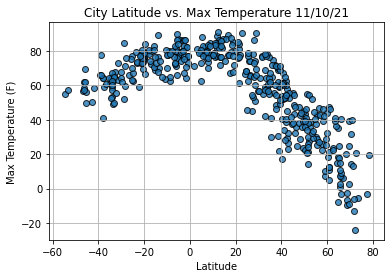

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


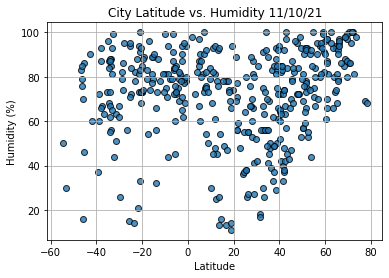

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

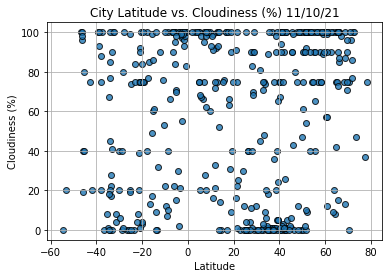

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


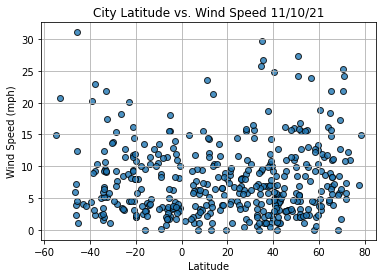

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2021-11-10 19:51:10
Lat                        3.0707
Lng                      172.7902
Max Temp                    80.87
Humidity                       72
Cloudiness                    100
Wind Speed                  14.85
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
413    False
414     True
415     True
416     True
417     True
Name: Lat, Length: 418, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Sept-Iles,CA,2021-11-10 19:51:07,50.2001,-66.3821,43.32,57,75,1.99
5,Margate,GB,2021-11-10 19:51:08,51.3813,1.3862,55.04,93,100,5.50
6,Timizart,DZ,2021-11-10 19:51:08,36.8000,4.2667,55.35,83,100,6.87
9,Coahuayana,MX,2021-11-10 19:51:09,18.7333,-103.6833,85.01,66,90,5.50
10,Fairview,US,2021-11-10 19:51:10,40.8126,-73.9990,67.35,42,0,5.01


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

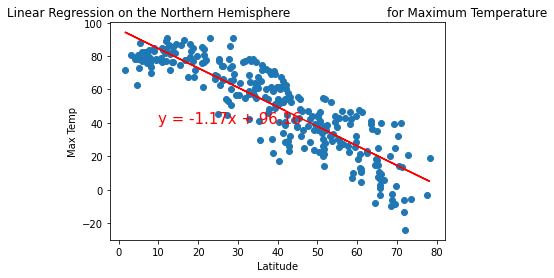

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

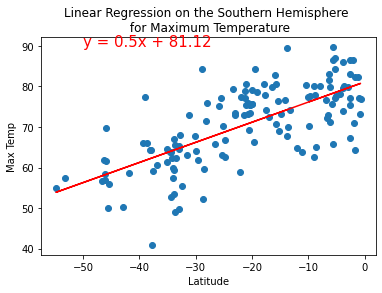

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


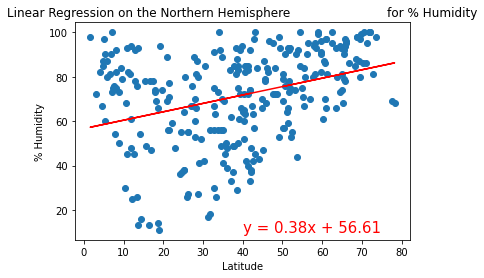

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

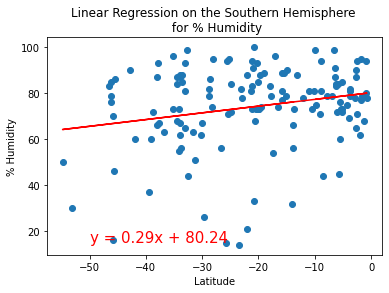

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


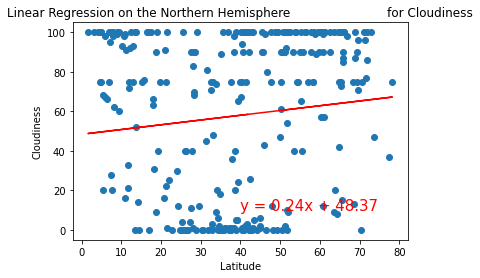

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

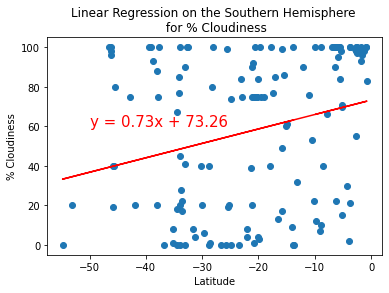

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


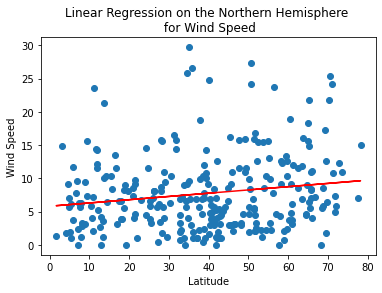

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

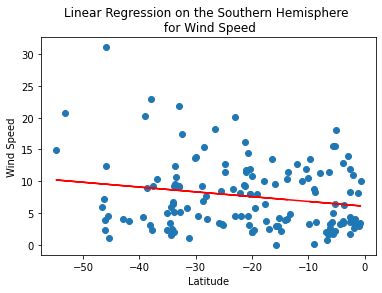

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))


In [54]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ModuleNotFoundError: No module named 'gmaps'